In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

from sklearn.metrics import r2_score

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, MeanAbsoluteError
from keras.models import Sequential, load_model
from keras.layers import Dense 

from keras.datasets import cifar100

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [3]:
X_train.shape 

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

### Data Preprocessing

In [7]:
# Normalize and reeshape images 
X_train_final = X_train.reshape(-1, 32*32*3) / 255
X_test_final = X_test.reshape(-1, 32*32*3) / 255

In [8]:
X_train_final.shape

(50000, 3072)

### Modelling

In [12]:
model = Sequential()
model.add(Dense(512, input_dim=3072, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 100)               12900     
                                                                 
Total params: 1,651,940
Trainable params: 1,651,940
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="SparseCategoricalCrossentropy", optimizer="Adam", metrics=["accuracy"])

In [14]:
result = model.fit(X_train_final, y_train, verbose=1, epochs=100, validation_data=(X_test_final, y_test))

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 4.4162 - accuracy: 0.0301 - val_loss: 4.1457 - val_accuracy: 0.0582
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 3.9597 - accuracy: 0.0862 - val_loss: 3.8753 - val_accuracy: 0.1019
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 3.7707 - accuracy: 0.1184 - val_loss: 3.7343 - val_accuracy: 0.1237
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 3.6668 - accuracy: 0.1359 - val_loss: 3.6386 - val_accuracy: 0.1460
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 3.5907 - accuracy: 0.1504 - val_loss: 3.6333 - val_accuracy: 0.1461
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 3.5314 - accuracy: 0.1602 - val_loss: 3.6467 - val_accuracy: 0.1438
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 3.4821 - accuracy: 0.1712 - val_loss: 3.5249 - val_ac

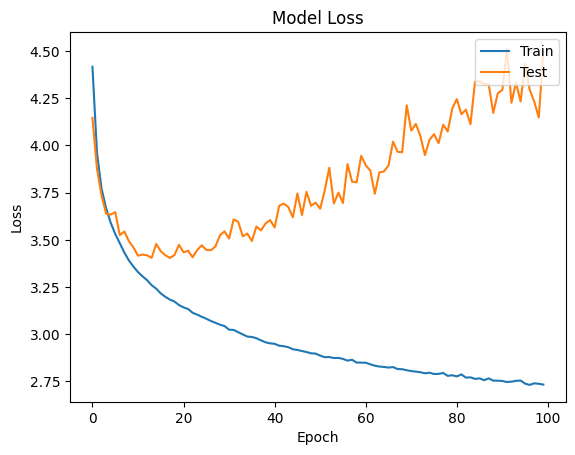

In [15]:
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

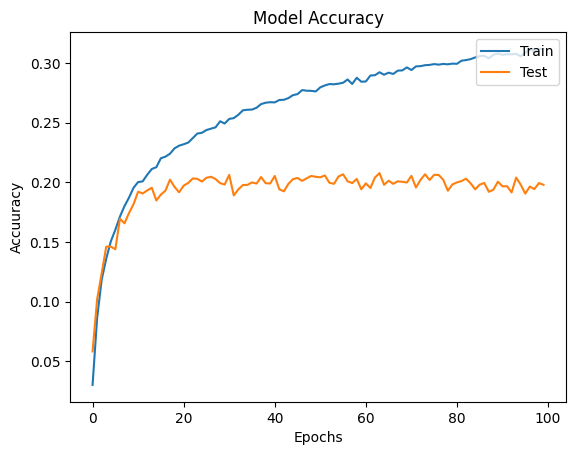

In [16]:
plt.plot(result.history["accuracy"])
plt.plot(result.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

In [17]:
model.save("models/cifar100_classification_model_gpu.h5")